<a href="https://colab.research.google.com/github/Pranayshukla0610/Ensemble_learning_machine_learning/blob/main/VotingEnsembleClassifier_On_Bank_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy pandas matplotlib seaborn plotly scikit-learn

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
df = pd.read_csv('/content/bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
df.value_counts()

age  job      marital   education  default  balance  housing  loan  contact    day  month  duration  campaign  pdays  previous  poutcome  deposit
95   retired  divorced  primary    no       2282     no       no    telephone  21   apr    207       17        -1     0         unknown   yes        1
18   student  single    primary    no       608      no       no    cellular   12   aug    267       1         -1     0         unknown   yes        1
                                                                               13   nov    210       1          93    1         success   yes        1
                        secondary  no       5        no       no    cellular   24   aug    143       2         -1     0         unknown   no         1
                        unknown    no       3        no       no    cellular   25   aug    130       2         -1     0         unknown   yes        1
                                                                                                                                                    ..
19   student  single    secondary  no       329      no       no    cellular   30   apr    169       1          190   2         success   yes        1
                                                                               22   oct    252       2         -1     0         unknown   yes        1
                                            302      no       no    cellular   16   jul    205       1         -1     0         unknown   yes        1
                                            55       no       no    telephone  6    oct    89        2          193   1         other     no         1
                        primary    no       608      no       no    cellular   12   may    236       1          180   2         success   yes        1
Name: count, Length: 11162, dtype: int64

In [5]:
df['loan'] = df['loan'].map({'yes':1,'no':0})

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  int64 
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.4+ MB


In [7]:
df.describe()

,age,balance,loan,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,0.130801,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,0.337198,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,0.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,0.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,0.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,0.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,1.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [11]:
df['loan'].value_counts()

,count
loan,
0,9702
1,1460


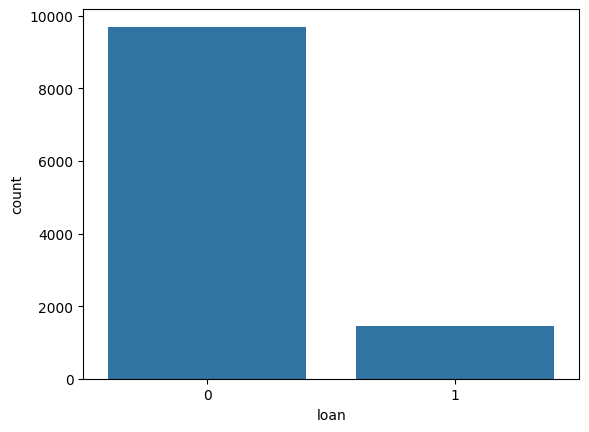

In [12]:
sns.countplot(x='loan',data=df)
plt.show()

In [14]:
cat_cols = df.select_dtypes(include='object').columns

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])


In [15]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


In [16]:
df['education'].value_counts()

,count
education,
1,5476
2,3689
0,1500
3,497


In [17]:
df['job'].value_counts()

,count
job,
4,2566
1,1944
9,1823
0,1334
7,923
5,778
6,405
8,360
10,357


In [22]:
df['age'] = df['age'].isnull().sum()
df['age']

,age
0,0
1,0
2,0
3,0
4,0
...,...
11157,0
11158,0
11159,0
11160,0


In [23]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [25]:
df[df['age_group'].isna()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,age_group
2464,0,8,2,3,0,108,0,0,0,10,1,167,1,-1,0,3,1,NaN
2498,0,8,2,0,0,608,0,0,0,12,1,267,1,-1,0,3,1,NaN
2654,0,8,2,3,0,108,0,0,0,8,11,169,1,-1,0,3,1,NaN
2935,0,8,2,0,0,608,0,0,0,13,9,210,1,93,1,2,1,NaN
3174,0,8,2,3,0,108,0,0,0,9,3,92,1,183,1,2,1,NaN
3494,0,8,2,3,0,348,0,0,0,5,8,443,4,-1,0,3,1,NaN
4219,0,8,2,3,0,3,0,0,0,25,1,130,2,-1,0,3,1,NaN
6456,0,8,2,1,0,5,0,0,0,24,1,143,2,-1,0,3,0,NaN


In [26]:
df['age_group'] = pd.cut(
    df['age'],
    bins=[18,30,45,60,100],
    labels=[0,1,2,3]
)

df['age_group'] = df['age_group'].cat.add_categories([-1]).fillna(-1).astype(int)


In [27]:
df[df['age_group'].isna()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,age_group


In [28]:
df['age_group'].head()

,age_group
0,-1
1,-1
2,-1
3,-1
4,-1


In [29]:
df['balance_per_age'] = df['balance'] / (df['age'] + 1)

In [30]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,age_group,balance_per_age
0,0,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1,-1,2343.0
1,0,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1,-1,45.0
2,0,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1,-1,1270.0
3,0,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1,-1,2476.0
4,0,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1,-1,184.0


In [34]:
scaler = StandardScaler()

num_cols = df.columns.drop('loan')

df[num_cols] = scaler.fit_transform(df[num_cols])


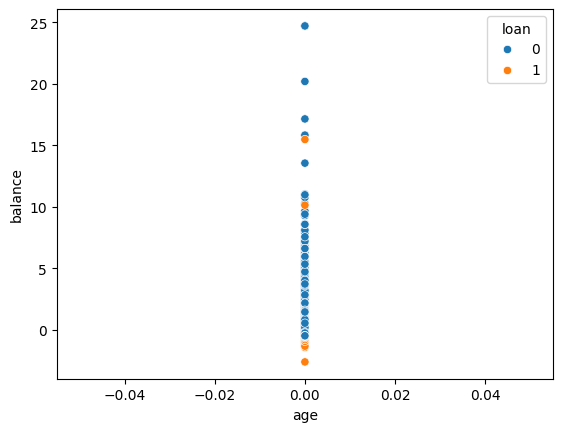

In [35]:
sns.scatterplot(x='age', y='balance', hue='loan', data=df)
plt.show()

In [37]:
fig = px.scatter_3d(
    df,
    x='age',
    y='balance',
    z='duration',
    color='loan'
)

fig.show()


In [38]:
X = df.drop('loan',axis=1)
y = df['loan']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [41]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
svm = SVC()
knn = KNeighborsClassifier()

In [42]:
from sklearn.ensemble import VotingClassifier
hard_vote = VotingClassifier(
    estimators=[
        ('lr',lr),
        ('dt',dt),
        ('svm',svm),
        ('knn',knn)
    ],
    voting = 'hard'
)

In [43]:
hard_vote.fit(X_train, y_train)
pred = hard_vote.predict(X_test)
print("Hard Voting Accuracy:", accuracy_score(y_test,pred))

Hard Voting Accuracy: 0.8781907747424988


In [50]:
from sklearn.svm import SVC

svm = SVC(probability=True)

In [51]:
soft_vote = VotingClassifier(
    estimators=[
        ('lr', lr),
        ('dt', dt),
        ('svm', svm),
        ('knn', knn)
    ],
    voting='soft'
)

In [52]:
soft_vote.fit(X_train,y_train)

pred = soft_vote.predict(X_test)

print(classification_report(y_test,pred))


              precision    recall  f1-score   support

           0       0.88      0.99      0.93      1960
           1       0.36      0.03      0.05       273

    accuracy                           0.88      2233
   macro avg       0.62      0.51      0.49      2233
weighted avg       0.82      0.88      0.83      2233



In [53]:
weighted_vote = VotingClassifier(
    estimators=[
        ('lr',lr),
        ('dt',dt),
        ('svm',svm),
        ('knn',knn)
    ],
    voting='soft',
    weights=[2,1,3,1]
)

In [54]:
weighted_vote.fit(X_train, y_train)
pred = weighted_vote.predict(X_test)
print('Weighted Voting Accuracy:',accuracy_score(y_test,pred))

Weighted Voting Accuracy: 0.8781907747424988


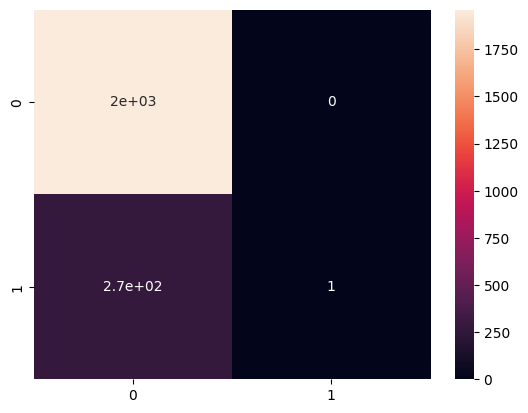

In [55]:
sns.heatmap(confusion_matrix(y_test,pred), annot=True)
plt.show()

In [59]:
from sklearn.model_selection import GridSearchCV

params = {
    'svm__C': [0.1, 1, 10],
    'knn__n_neighbors': [3, 5, 7]
}

grid = GridSearchCV(
    weighted_vote,
    param_grid=params,
    cv=3
)

grid.fit(X_train, y_train)

print(grid.best_params_)


{'knn__n_neighbors': 3, 'svm__C': 1}


In [60]:
from sklearn.calibration import CalibratedClassifierCV
calibrated_svm = CalibratedClassifierCV(svm)
calibrated_svm.fit(X_train, y_train)

CalibratedClassifierCV(estimator=SVC(probability=True))